# https://www.kaggle.com/code/prabhat12/svm-from-scratch

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

First five rows and col values 
X1 : 
 [[2.51526543 1.11143935]
 [1.8155981  1.11969719]
 [2.69637316 0.62563218]
 [1.67280531 0.65930057]
 [1.89593761 5.18540259]]  
 y1 :
 [ 1  1  1  1 -1]


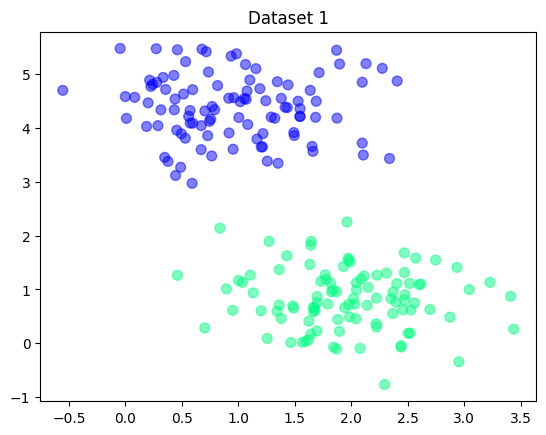

In [2]:
X1, y1 = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60)
y1 = np.where(y1 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X1[:5], " \n y1 :\n",y1[:5])
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1")
plt.show()

First five rows and col values 
X2 : 
 [[-0.19504998  0.96339392]
 [ 0.29481297  0.90077448]
 [ 0.44296721  0.86759335]
 [ 1.97192791  0.31698174]
 [ 0.79113393  0.34687575]]  
 y2 :
 [ 1  1  1  1 -1]


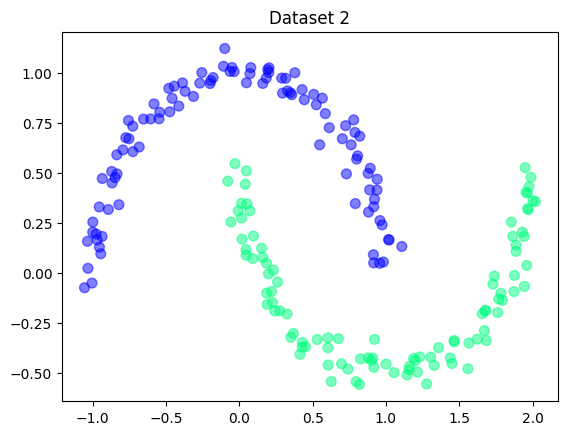

In [3]:
X2, y2 = make_moons(n_samples=200, noise=.05)
y2 = np.where(y2 <= 0, -1, 1)
print("First five rows and col values \nX2 : \n",X2[:5], " \n y2 :\n",y1[:5])
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 2")
plt.show()

First five rows and col values 
X1 : 
 [[ 0.89920519 -0.15813058]
 [-0.55613488 -0.11925181]
 [-0.58368571  0.0471504 ]
 [-0.86732722  0.57856456]
 [ 0.47748631 -0.10308515]]  
 y3 :
 [ 1  1  1  1 -1]


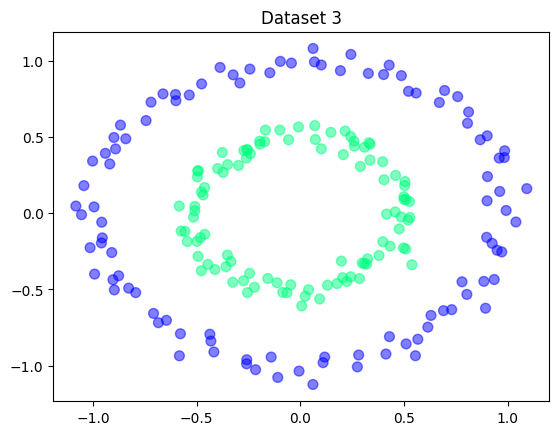

In [4]:
X3, y3 = noisy_circles = make_circles(n_samples=200, factor=.5, noise=.05)
y3 = np.where(y3 <= 0, -1, 1)
print("First five rows and col values \nX1 : \n",X3[:5], " \n y3 :\n",y1[:5])
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 3")
plt.show()

In [34]:
class SVM_soft_margin:

    def __init__(self, alpha = 0.001, lambda_ = 0.01, n_iterations = 1000):
        self.alpha = alpha # learning rate
        self.lambda_ = lambda_ # tradeoff
        self.n_iterations = n_iterations # number of iterations
        self.w = None # weights or slopes
        self.b = None # intercept


    def fit(self, X, y):
        
        n_samples, n_features = X.shape        
        self.w = np.zeros(n_features) # initalizing with 0
        self.b = 0 # initializewith 0
        
        for iteration in range(self.n_iterations):
            for i, Xi in enumerate(X):
                # yixiw-b≥1
                if y[i] * (np.dot(Xi, self.w) - self.b) >= 1 : 
                    self.w -= self.alpha * (2 * self.lambda_ * self.w) # w = w + α* (2λw - yixi)
                else:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w - np.dot(Xi, y[i])) # w = w + α* (2λw - yixi)
                    self.b -= self.alpha * y[i] # b = b - α* (yi)
        return self.w, self.b


    def predict(self, X):
        pred = np.dot(X, self.w) - self.b 
        result = [1 if val > 0 else -1 for val in pred] # returning in the form of -1 and 1
        return result

In [35]:
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

In [36]:
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):    

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])
    
    plt.title(title)
    plt.show()

For dataset 1, score: 1.0


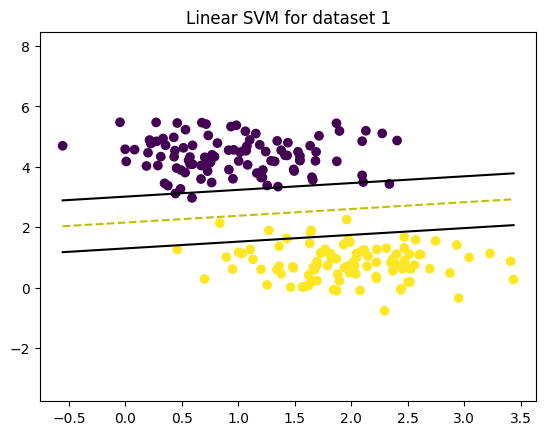

In [13]:
svm1 = SVM_soft_margin()
w1,b1 = svm1.fit(X1,y1)
print("For dataset 1, score:" ,accuracy_score(svm1.predict(X1),y1))
plot_svm(X1, y1, w1, b1, title= 'Linear SVM for dataset 1')

For dataset 2, score: 0.865


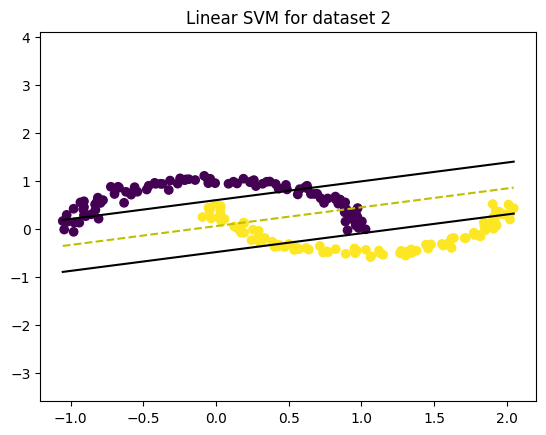

In [14]:
svm2 = SVM_soft_margin()
w2,b2 = svm2.fit(X2,y2)
print("For dataset 2, score:" ,accuracy_score(svm2.predict(X2),y2))
plot_svm(X2, y2, w2, b2, title= 'Linear SVM for dataset 2')

# https://github.com/luisguiserrano/manning/tree/master/Chapter_11_Support_Vector_Machines

In [3]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt

# Some functions to plot our points and draw the models
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = 's')

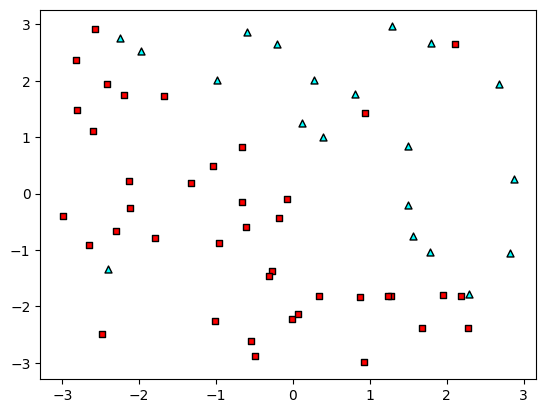

In [4]:
rows = []

import random

#Adding points
for i in range(50):
    x = 6*random.random()-3
    y = 6*random.random()-3
    z = int(x+y > 0.5)
    rows.append([x,y,z])

#Adding noise
for i in range(10):
    x = 6*random.random()-3
    y = 6*random.random()-3
    z = random.randint(0,1)
    rows.append([x,y,z])
    
df_linear = pd.DataFrame(rows, columns=['x_1', 'x_2', 'y'])

plot_points(df_linear[['x_1', 'x_2']], df_linear['y'])

df_linear.to_csv('./linear.csv')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.svm import SVC

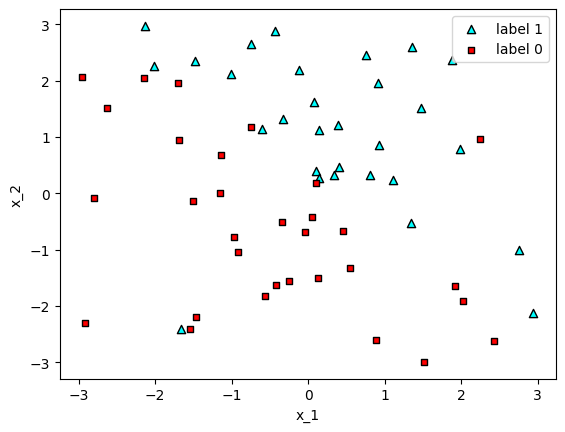

In [7]:
# Loading the linear dataset

linear_data = pd.read_csv('linear.csv')
features = np.array(linear_data[['x_1', 'x_2']])
labels = np.array(linear_data['y'])
utils.plot_points(features, labels)

Accuracy: 0.9333333333333333


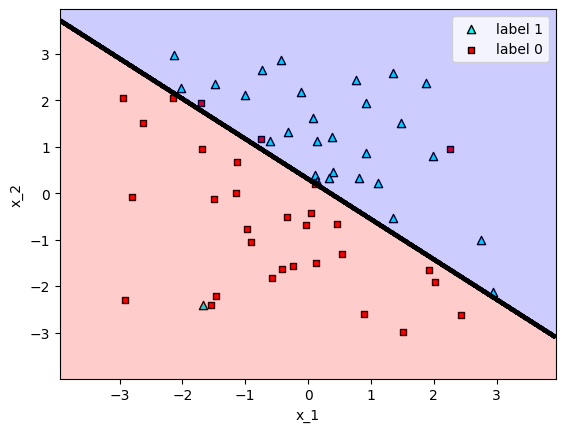

In [8]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(features, labels)
print("Accuracy:", svm_linear.score(features, labels))
utils.plot_model(features, labels, svm_linear)

C = 0.01
Accuracy: 0.8166666666666667


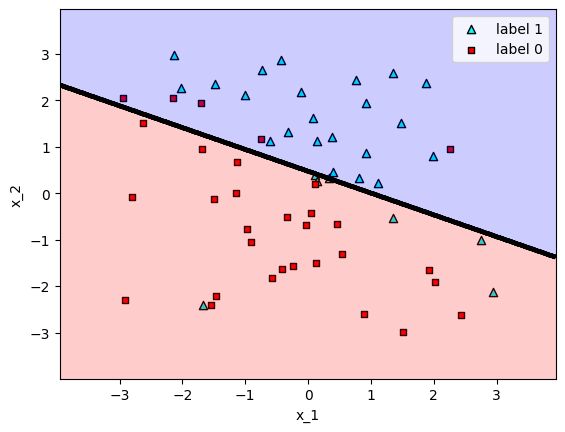

C = 100
Accuracy: 0.9333333333333333


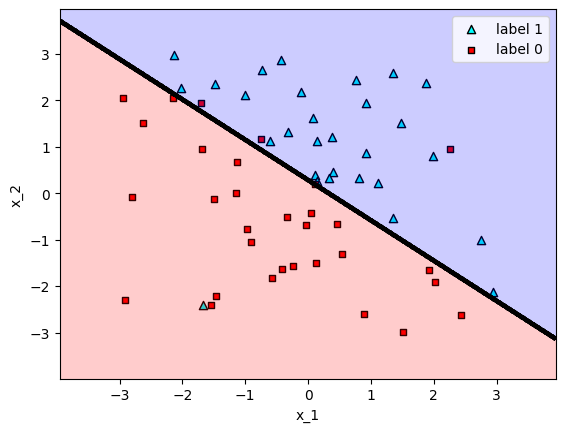

In [9]:
# C = 0.01
svm_c_001 = SVC(kernel='linear', C=0.01)
svm_c_001.fit(features, labels)
print("C = 0.01")
print("Accuracy:", svm_c_001.score(features, labels))
utils.plot_model(features, labels, svm_c_001)

# C = 100
svm_c_100 = SVC(kernel='linear', C=100)
svm_c_100.fit(features, labels)
print("C = 100")
print("Accuracy:", svm_c_100.score(features, labels))
utils.plot_model(features, labels, svm_c_100)

# https://github.com/SSaishruthi/SVM-using-Numpy/blob/master/SVM.ipynb

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Input data
x = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],

])


#output label
y = np.array([-1, -1, 1, 1, 1])

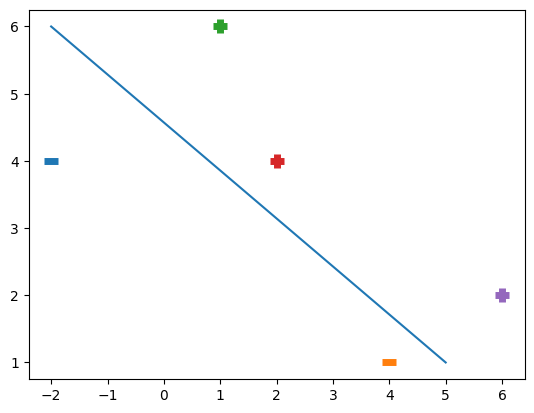

In [13]:
for val, inp in enumerate(x):
    if y[val] == -1:
        plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
    else:
        plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5)

plt.plot([-2,6],[6,1])

In [14]:
def svm_function(x,y):
    #initilizing weight
    w = np.zeros(len(x[0]))
    #initialize learning rate
    l_rate = 1
    #epoch
    epoch = 100000
    #output list
    out = []
    #training svm
    for e in range(epoch):
        for i, val in enumerate(x):
            val1 = np.dot(x[i], w)
            if (y[i]*val1 < 1):
                w = w + l_rate * ((y[i]*x[i]) - (2*(1/epoch)*w))
            else:
                w = w + l_rate * (-2*(1/epoch)*w)
    
    for i, val in enumerate(x):
        out.append(np.dot(x[i], w))
    
    return w, out

In [15]:
w, out = svm_function(x,y)


In [16]:
print('Calculated weights')
print(w)

Calculated weights
[ 1.50157001  3.00057251 10.50863266]


In [17]:
print('predicted output')
print(out)

predicted output
[-1.509482661019593, -1.5017801059577938, 8.996372385026156, 4.496797386268188, 4.501932422976054]


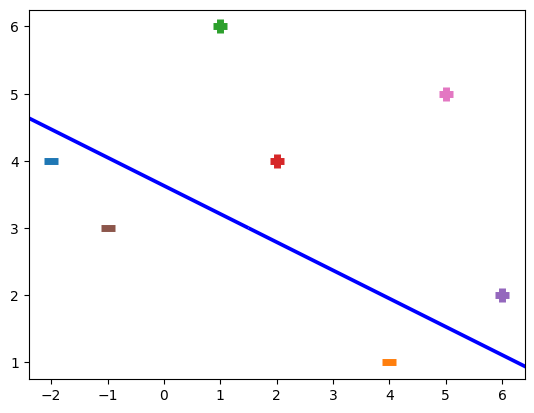

In [18]:
u = np.array([
    [-1,3,-1],
    [5,5,-1],
    
])
   
    
for val, inp in enumerate(x):
    if y[val] == -1:
        plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5)
    else:
        plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5)

plt.scatter(-1,3, s=100, marker='_', linewidths=5)   
plt.scatter(5,5, s=100, marker='+', linewidths=5)   


x1=[w[0],w[1],-w[1],w[0]]
x2=[w[0],w[1],w[1],-w[0]]

x1x2 =np.array([x1,x2])
X,Y,U,V = zip(*x1x2)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

In [9]:
u = np.array([
    [-1,3,-1],
    [5,5,-1],
    
])

In [10]:
result = []
for i, val in enumerate(u):
        result.append(np.dot(u[i], w))

In [11]:
print('test result')
print(result)

test result
[-3.0084851544876052, 12.002079927023981]
